In [1]:
import os
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
SEQUENCE_NAMES = ['NEXT_FIT','BEST_FIT','BEST_FIT_DECR','FIRST_FIT','FIRST_FIT_DECR']
PLOT_LEGEND_LOC = 'upper left'
COLORS = ["b","y","r","g","c"]

In [3]:
def load_data(file):
    csv_path = os.path.join("", file)
    return pd.read_csv(csv_path, header=None)

In [4]:
def extract(file_name):
    file = file_name + ".csv"
    data = load_data(file)
    data = data.values.ravel()
    size = data.size
    return data

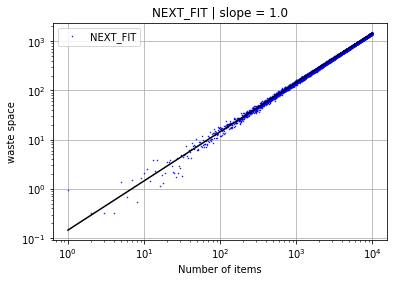

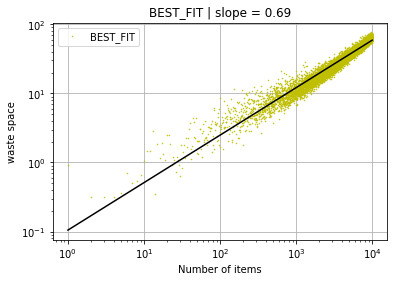

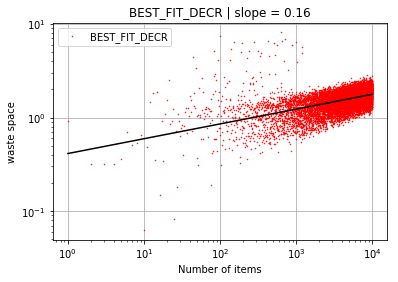

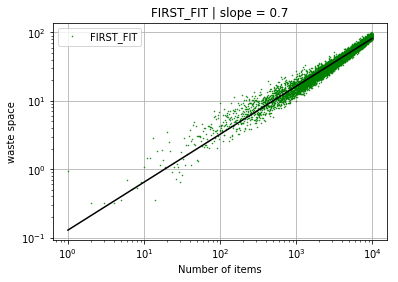

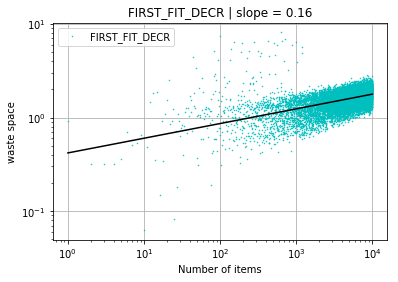

In [5]:
def plot_graph():
    for idx in range(len(SEQUENCE_NAMES)):
        file_name = SEQUENCE_NAMES[idx]
        y = extract(file_name)
        x = [i for i in range(1,len(y)+1)]
        
        logA = np.log(x)
        logB = np.log(y)
        m, c = np.polyfit(logA, logB, 1) # fit log(y) = m*log(x) + c
        y_fit = np.exp(m*logA + c) # calculate the fitted values of y 

        plt.loglog(x, y, '.' , label=file_name, color=COLORS[idx], markersize='1') 
        plt.plot(x, y_fit,color='black')
        plt.legend(loc=PLOT_LEGEND_LOC)
        plt.xlabel("Number of items")
        plt.ylabel("waste space")
        plt.title(file_name + " | slope = " + str(round(m,2)))
        plt.grid()
        plt.savefig(file_name + ".png",dpi=500)
        plt.show()  
plot_graph()